In [140]:
!pip install numpy 
!pip install pandas 


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [142]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)  # Show max 50 rows

df = pd.read_csv('train_heart.csv')
df

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7,Absence
629996,629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3,Absence
629997,629997,67,1,4,130,275,0,0,149,0,0.0,1,2,7,Presence
629998,629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6,Presence


In [143]:
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Numer of columns: {df.shape[1]}")

Dataset shape: (630000, 15)
Number of rows: 630000
Numer of columns: 15


In [144]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Heart Disease  

In [145]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [146]:
print("Missing values per column: ")
print(df.isnull().sum())
print(f"\ntotal missing values: {df.isnull().sum().sum()}")

Missing values per column: 
id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

total missing values: 0


In [147]:
df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [148]:
print(df['Heart Disease'].value_counts())
print("\nPercentage distribution: ")
print(df['Heart Disease'].value_counts(normalize=True) * 100)

Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

Percentage distribution: 
Heart Disease
Absence     55.166032
Presence    44.833968
Name: proportion, dtype: float64


# Exploratory Data Analysis 

In [149]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [151]:
print("All columns : ")
print(df.columns.tolist())

All columns : 
['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


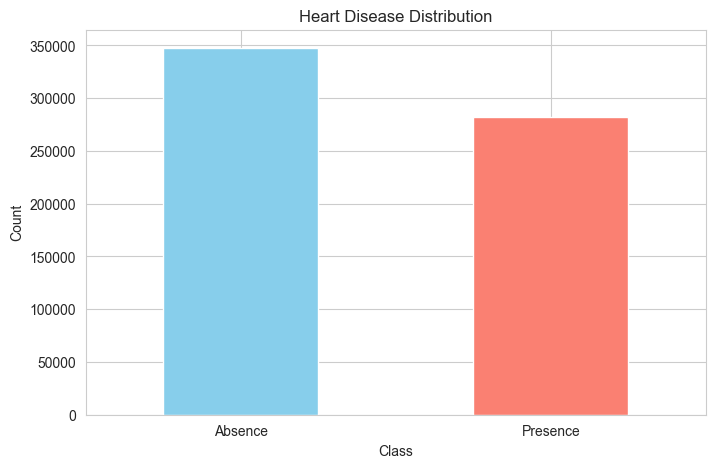


Value counrts: 
Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

Percentage distribution: 
Heart Disease
Absence     55.166032
Presence    44.833968
Name: proportion, dtype: float64


In [152]:
target_col = 'Heart Disease'
plt.figure(figsize=(8,5))
df[target_col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("\nValue counrts: ")
print(df[target_col].value_counts())
print("\nPercentage distribution: ")
print(df[target_col].value_counts(normalize=True) * 100)

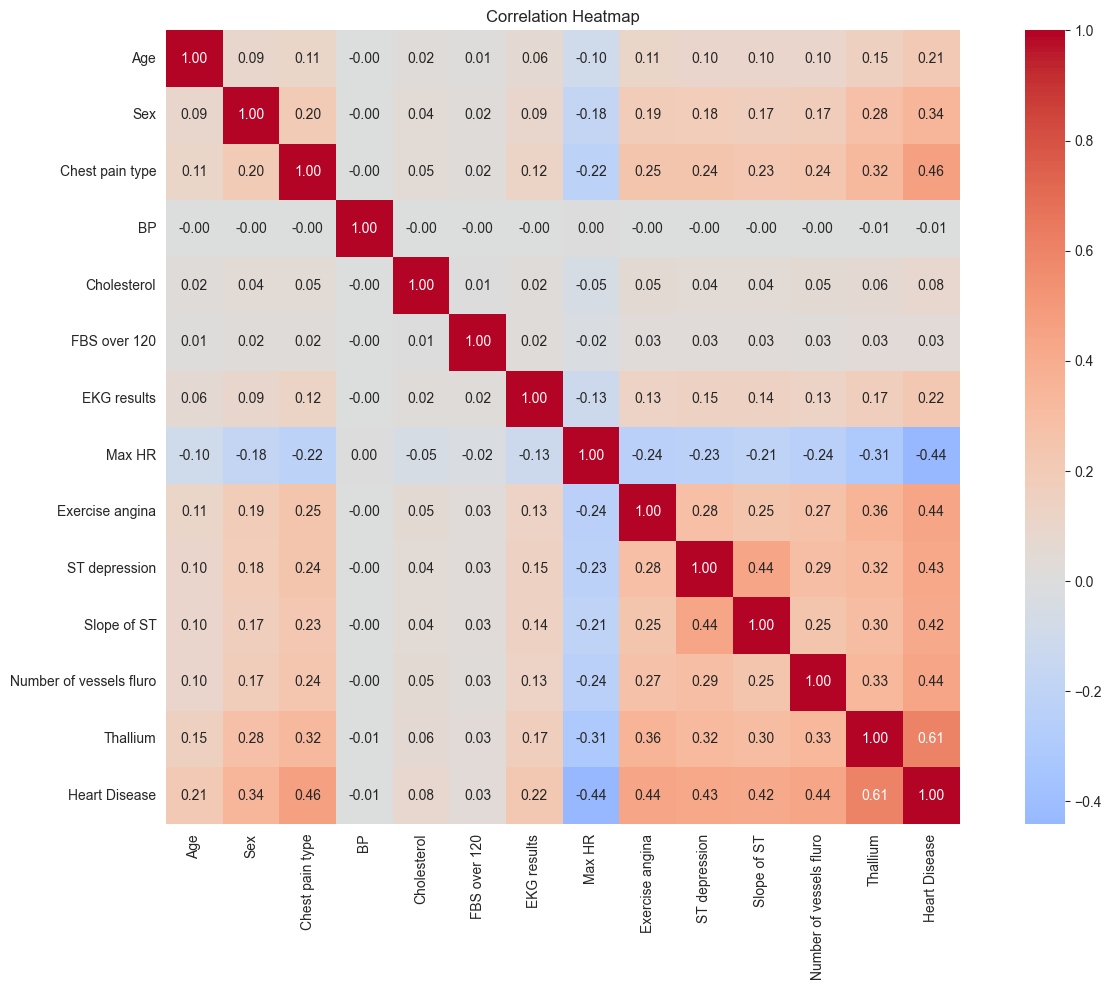

In [153]:
df_corr= df.copy()
df_corr[target_col] = df_corr[target_col].map({'Presence': 1, 'Absence': 0})
plt.figure(figsize=(14,10))
correlation_matrix = df_corr.drop('id',axis=1).corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap='coolwarm',center=0,square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

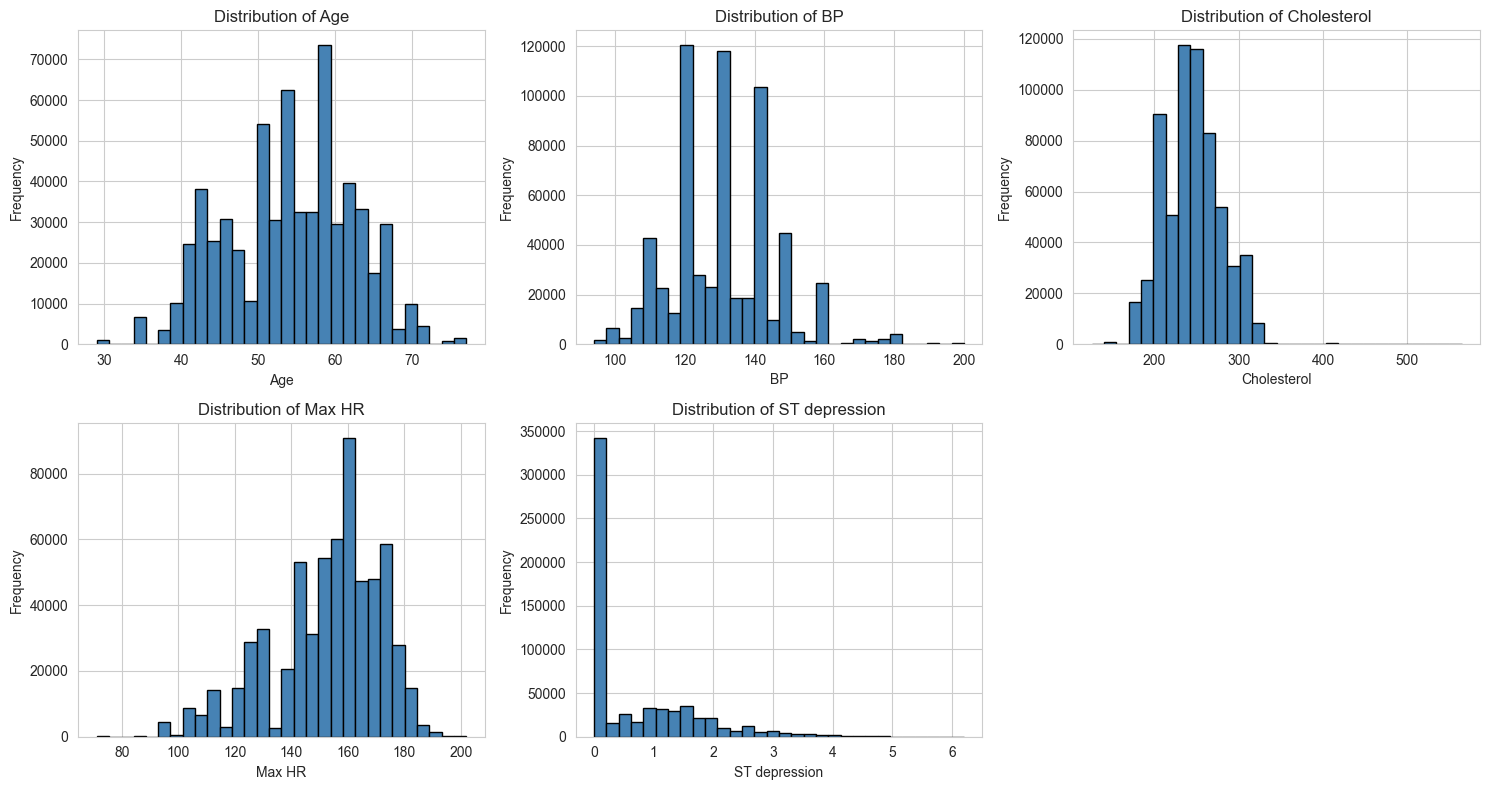

In [154]:
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i], edgecolor='black', color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

In [155]:
df[target_col] = df[target_col].map({'Presence': 1, 'Absence': 0})

print("target variable after encoding :")
print(df[target_col].value_counts())

target variable after encoding :
Heart Disease
0    347546
1    282454
Name: count, dtype: int64


# Feature Engineering
Create new features to capture complex relationships

In [156]:
# Create engineered features BEFORE splitting data
df_engineered = df.copy()

# 1. Age groups (risk increases with age)
df_engineered['Age_Group'] = pd.cut(df_engineered['Age'], 
                                      bins=[0, 40, 55, 70, 100], 
                                      labels=[0, 1, 2, 3])

# 2. BP categories
df_engineered['BP_Category'] = pd.cut(df_engineered['BP'], 
                                       bins=[0, 120, 140, 180, 300], 
                                       labels=[0, 1, 2, 3])

# 3. Cholesterol risk
df_engineered['Chol_Risk'] = pd.cut(df_engineered['Cholesterol'], 
                                     bins=[0, 200, 240, 300, 600], 
                                     labels=[0, 1, 2, 3])

# 4. Interaction features
df_engineered['Age_BP_Interaction'] = df_engineered['Age'] * df_engineered['BP']
df_engineered['Age_Chol_Interaction'] = df_engineered['Age'] * df_engineered['Cholesterol']
df_engineered['BP_Chol_Interaction'] = df_engineered['BP'] * df_engineered['Cholesterol']
df_engineered['MaxHR_STdep_Interaction'] = df_engineered['Max HR'] * df_engineered['ST depression']

# 5. Risk score (combining multiple factors)
df_engineered['Risk_Score'] = (df_engineered['Age'] / 100) + (df_engineered['BP'] / 200) + \
                               (df_engineered['Cholesterol'] / 300) + (df_engineered['ST depression'] * 2)

# 6. HR Reserve (Max HR relative to age-predicted max)
df_engineered['HR_Reserve'] = df_engineered['Max HR'] - (220 - df_engineered['Age'])

# 7. Polynomial features for key variables
df_engineered['Age_Squared'] = df_engineered['Age'] ** 2
df_engineered['BP_Squared'] = df_engineered['BP'] ** 2
df_engineered['Cholesterol_Squared'] = df_engineered['Cholesterol'] ** 2

# Convert categorical features to numeric
df_engineered['Age_Group'] = df_engineered['Age_Group'].astype(int)
df_engineered['BP_Category'] = df_engineered['BP_Category'].astype(int)
df_engineered['Chol_Risk'] = df_engineered['Chol_Risk'].astype(int)

print(f"Original features: {df.shape[1]}")
print(f"After feature engineering: {df_engineered.shape[1]}")
print(f"\nNew features added: {df_engineered.shape[1] - df.shape[1]}")
print("\nNew columns:")
print([col for col in df_engineered.columns if col not in df.columns])

Original features: 15
After feature engineering: 27

New features added: 12

New columns:
['Age_Group', 'BP_Category', 'Chol_Risk', 'Age_BP_Interaction', 'Age_Chol_Interaction', 'BP_Chol_Interaction', 'MaxHR_STdep_Interaction', 'Risk_Score', 'HR_Reserve', 'Age_Squared', 'BP_Squared', 'Cholesterol_Squared']


In [157]:
# Split data with engineered features
X_eng = df_engineered.drop(['id', 'Heart Disease'], axis=1)
y_eng = df_engineered['Heart Disease']

print(f"Features shape with engineering: {X_eng.shape}")
print(f"Target shape: {y_eng.shape}")

Features shape with engineering: (630000, 25)
Target shape: (630000,)


In [158]:
from sklearn.model_selection import train_test_split

X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng, y_eng, test_size=0.2, random_state=42, stratify=y_eng
)

print(f"Training set size: {X_train_eng.shape[0]}")
print(f"Test set size: {X_test_eng.shape[0]}")
print(f"Training features: {X_train_eng.shape[1]}")

Training set size: 504000
Test set size: 126000
Training features: 25


In [159]:
# Scale engineered features
scaler_eng = StandardScaler()
X_train_eng_scaled = scaler_eng.fit_transform(X_train_eng)
X_test_eng_scaled = scaler_eng.transform(X_test_eng)

print("Scaling complete with engineered features!")
print(f"Scaled training shape: {X_train_eng_scaled.shape}")

Scaling complete with engineered features!
Scaled training shape: (504000, 25)


# Hyperparameter Tuning
Optimize XGBoost parameters for better performance

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

# Define parameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create base model
xgb_base = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Grid search with cross-validation
print("Starting hyperparameter tuning... This may take several minutes.")
start_time = time.time()

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_eng_scaled, y_train_eng)

training_time = time.time() - start_time
print(f"\nTuning completed in {training_time:.2f} seconds")
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Starting hyperparameter tuning... This may take several minutes.
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


In [ ]:
# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred_eng = best_xgb_model.predict(X_test_eng_scaled)
y_pred_proba_eng = best_xgb_model.predict_proba(X_test_eng_scaled)

# Evaluate
accuracy_eng = accuracy_score(y_test_eng, y_pred_eng)
print(f"Optimized Accuracy: {accuracy_eng:.4f} ({accuracy_eng*100:.2f}%)")
print(f"Improvement: {(accuracy_eng - accuracy)*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_eng, y_pred_eng))

print("\nConfusion Matrix:")
cm_eng = confusion_matrix(y_test_eng, y_pred_eng)
print(cm_eng)

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_eng, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Optimized Model Confusion Matrix\nAccuracy: {accuracy_eng:.4f}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Apply Feature Engineering to Test Set
Process test data with same transformations

In [ ]:
# Engineer features for test set
test_df_eng = test_df.copy()

# Apply same transformations
test_df_eng['Age_Group'] = pd.cut(test_df_eng['Age'], 
                                    bins=[0, 40, 55, 70, 100], 
                                    labels=[0, 1, 2, 3])

test_df_eng['BP_Category'] = pd.cut(test_df_eng['BP'], 
                                      bins=[0, 120, 140, 180, 300], 
                                      labels=[0, 1, 2, 3])

test_df_eng['Chol_Risk'] = pd.cut(test_df_eng['Cholesterol'], 
                                    bins=[0, 200, 240, 300, 600], 
                                    labels=[0, 1, 2, 3])

# Interaction features
test_df_eng['Age_BP_Interaction'] = test_df_eng['Age'] * test_df_eng['BP']
test_df_eng['Age_Chol_Interaction'] = test_df_eng['Age'] * test_df_eng['Cholesterol']
test_df_eng['BP_Chol_Interaction'] = test_df_eng['BP'] * test_df_eng['Cholesterol']
test_df_eng['MaxHR_STdep_Interaction'] = test_df_eng['Max HR'] * test_df_eng['ST depression']

# Risk score
test_df_eng['Risk_Score'] = (test_df_eng['Age'] / 100) + (test_df_eng['BP'] / 200) + \
                             (test_df_eng['Cholesterol'] / 300) + (test_df_eng['ST depression'] * 2)

# HR Reserve
test_df_eng['HR_Reserve'] = test_df_eng['Max HR'] - (220 - test_df_eng['Age'])

# Polynomial features
test_df_eng['Age_Squared'] = test_df_eng['Age'] ** 2
test_df_eng['BP_Squared'] = test_df_eng['BP'] ** 2
test_df_eng['Cholesterol_Squared'] = test_df_eng['Cholesterol'] ** 2

# Convert categorical to numeric
test_df_eng['Age_Group'] = test_df_eng['Age_Group'].astype(int)
test_df_eng['BP_Category'] = test_df_eng['BP_Category'].astype(int)
test_df_eng['Chol_Risk'] = test_df_eng['Chol_Risk'].astype(int)

print(f"Test data engineered: {test_df_eng.shape}")
print(f"Features match training: {test_df_eng.shape[1] - 1 == X_eng.shape[1]}")

In [ ]:
# Prepare test data
test_ids_eng = test_df_eng['id']
X_test_final_eng = test_df_eng.drop('id', axis=1)

# Scale test data
X_test_final_eng_scaled = scaler_eng.transform(X_test_final_eng)

print(f"Test data prepared: {X_test_final_eng_scaled.shape}")

In [ ]:
# Make predictions with optimized model
test_predictions_eng = best_xgb_model.predict(X_test_final_eng_scaled)

# Create submission
submission_eng = pd.DataFrame({
    'id': test_ids_eng,
    'Heart Disease': test_predictions_eng
})

submission_eng.to_csv('submission_optimized_v2.csv', index=False)

print("Optimized submission file created: submission_optimized_v2.csv")
print(f"\nSubmission shape: {submission_eng.shape}")
print("\nPrediction distribution:")
print(f"Predicted Presence (1): {sum(test_predictions_eng)}")
print(f"Predicted Absence (0): {len(test_predictions_eng) - sum(test_predictions_eng)}")
print("\nFirst few rows:")
print(submission_eng.head(10))

# Optional: Ensemble with Multiple Models
Combine predictions from multiple algorithms for potential further improvement

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# Create multiple models
rf_model = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, n_jobs=-1)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train individual models
print("Training Random Forest...")
rf_model.fit(X_train_eng_scaled, y_train_eng)
rf_pred = rf_model.predict(X_test_eng_scaled)
rf_acc = accuracy_score(y_test_eng, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

print("\nTraining Gradient Boosting...")
gb_model.fit(X_train_eng_scaled, y_train_eng)
gb_pred = gb_model.predict(X_test_eng_scaled)
gb_acc = accuracy_score(y_test_eng, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")

print("\nTraining Logistic Regression...")
lr_model.fit(X_train_eng_scaled, y_train_eng)
lr_pred = lr_model.predict(X_test_eng_scaled)
lr_acc = accuracy_score(y_test_eng, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

print(f"\nOptimized XGBoost Accuracy: {accuracy_eng:.4f}")

In [ ]:
# Create voting ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_xgb_model),
        ('rf', rf_model),
        ('gb', gb_model),
        ('lr', lr_model)
    ],
    voting='soft',  # Use probability averaging
    n_jobs=-1
)

print("Training Voting Ensemble...")
voting_clf.fit(X_train_eng_scaled, y_train_eng)

# Evaluate ensemble
ensemble_pred = voting_clf.predict(X_test_eng_scaled)
ensemble_acc = accuracy_score(y_test_eng, ensemble_pred)

print(f"\n{'='*50}")
print(f"ENSEMBLE ACCURACY: {ensemble_acc:.4f} ({ensemble_acc*100:.2f}%)")
print(f"{'='*50}")
print(f"\nImprovement over original: {(ensemble_acc - accuracy)*100:.2f}%")
print(f"Improvement over optimized XGBoost: {(ensemble_acc - accuracy_eng)*100:.2f}%")

print("\nEnsemble Classification Report:")
print(classification_report(y_test_eng, ensemble_pred))

In [ ]:
# Make ensemble predictions on test set
test_predictions_ensemble = voting_clf.predict(X_test_final_eng_scaled)

# Create ensemble submission
submission_ensemble = pd.DataFrame({
    'id': test_ids_eng,
    'Heart Disease': test_predictions_ensemble
})

submission_ensemble.to_csv('submission_ensemble.csv', index=False)

print("Ensemble submission file created: submission_ensemble.csv")
print(f"\nSubmission shape: {submission_ensemble.shape}")
print("\nPrediction distribution:")
print(f"Predicted Presence (1): {sum(test_predictions_ensemble)}")
print(f"Predicted Absence (0): {len(test_predictions_ensemble) - sum(test_predictions_ensemble)}")
print("\nFirst few rows:")
print(submission_ensemble.head(10))

In [ ]:
X = df.drop(['id','Heart Disease'], axis=1)
y = df[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (630000, 13)
Target shape: (630000,)


In [ ]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} ")
print(f"Test set size: {X_test.shape[0]} ")
print(f"Training set class distributuion: \n{y_train.value_counts(normalize=True) * 100}")
print(y_train.value_counts())

Training set size: 504000 
Test set size: 126000 
Training set class distributuion: 
Heart Disease
0    55.166071
1    44.833929
Name: proportion, dtype: float64
Heart Disease
0    278037
1    225963
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete ! ")
print(f"Scaled training shape : {X_train_scaled.shape} ") 


Scaling complete ! 
Scaled training shape : (504000, 13) 


In [ ]:
!pip install xgboost 


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import xgboost as xgb 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score 

# Create and traun the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)
print("XGBoost model trained successfully !")


XGBoost model trained successfully !


In [ ]:
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)

print("Predictions complete ! ")

Predictions complete ! 


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}({accuracy*100:.2f}%) ")

# classification report 

print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

# Confusion matrix

print("\nConfusion Matrix: ")
cm= confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8885(88.85%) 

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     69509
           1       0.88      0.87      0.87     56491

    accuracy                           0.89    126000
   macro avg       0.89      0.89      0.89    126000
weighted avg       0.89      0.89      0.89    126000


Confusion Matrix: 
[[62961  6548]
 [ 7505 48986]]


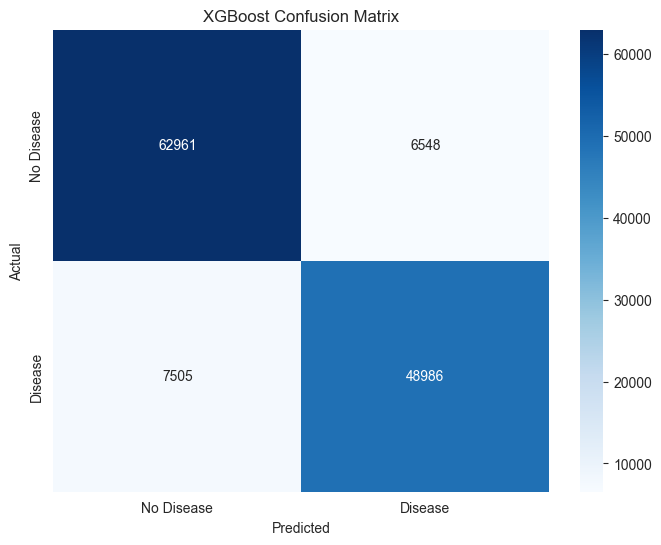

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

C:\Users\LAB\AppData\Local\Temp\ipykernel_31696\65967950.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


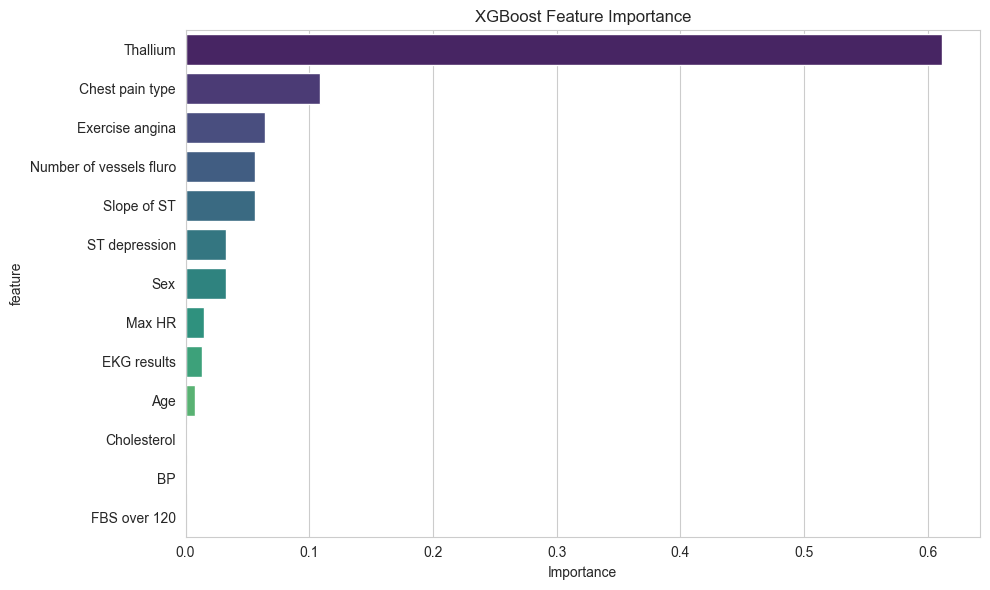


Top 5 Most Important Features:
                    feature  importance
12                 Thallium    0.611723
2           Chest pain type    0.108324
8           Exercise angina    0.063941
11  Number of vessels fluro    0.056157
10              Slope of ST    0.056091


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

In [ ]:
# Load test data
test_df = pd.read_csv('test.csv')
print(f"Test data shape: {test_df.shape}")
print("\nTest data columns:")
print(test_df.columns.tolist())
test_df.head()

Test data shape: (270000, 14)

Test data columns:
['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


In [ ]:
# Save test IDs
test_ids = test_df['id']

# Drop id column (keep same features as training)
X_test_final = test_df.drop('id', axis=1)

# Scale the test data using the same scaler
X_test_final_scaled = scaler.transform(X_test_final)

print(f"Test data prepared: {X_test_final_scaled.shape}")

Test data prepared: (270000, 13)


In [ ]:
# Make predictions (keep as 0/1, not strings)
test_predictions = xgb_model.predict(X_test_final_scaled)

print(f"Predictions made for {len(test_predictions)} samples")
print(f"Predicted Presence (1): {sum(test_predictions)}")
print(f"Predicted Absence (0): {len(test_predictions) - sum(test_predictions)}")

Predictions made for 270000 samples
Predicted Presence (1): 119421
Predicted Absence (0): 150579


In [ ]:
# Create submission dataframe with numeric values (0/1)
submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_predictions  # Use numeric predictions directly
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")
print(f"\nSubmission shape: {submission.shape}")
print("\nFirst few rows:")
print(submission.head(10))
print(f"\nData type of 'Heart Disease': {submission['Heart Disease'].dtype}")

Submission file created: submission.csv

Submission shape: (270000, 2)

First few rows:
       id  Heart Disease
0  630000              1
1  630001              0
2  630002              1
3  630003              0
4  630004              0
5  630005              1
6  630006              0
7  630007              1
8  630008              1
9  630009              0

Data type of 'Heart Disease': int64
